# Учимся работе с данными - от загрузки до моделирования

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/ml dataset otus.csv")

In [ ]:
stats = df.describe()
print(stats)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
statistics = df.describe(include='all')
print(statistics)

                  id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
c

In [ ]:
features = ["smoothness_mean", "radius_mean", "area_worst"]
target_variable = "diagnosis"
sns.set(style="whitegrid")

/tmp/ipython-input-4219132524.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


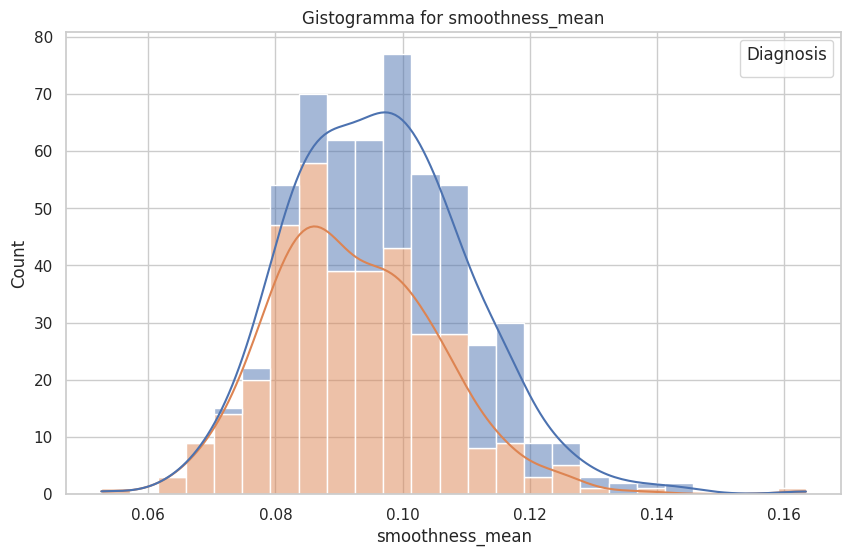

/tmp/ipython-input-4219132524.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


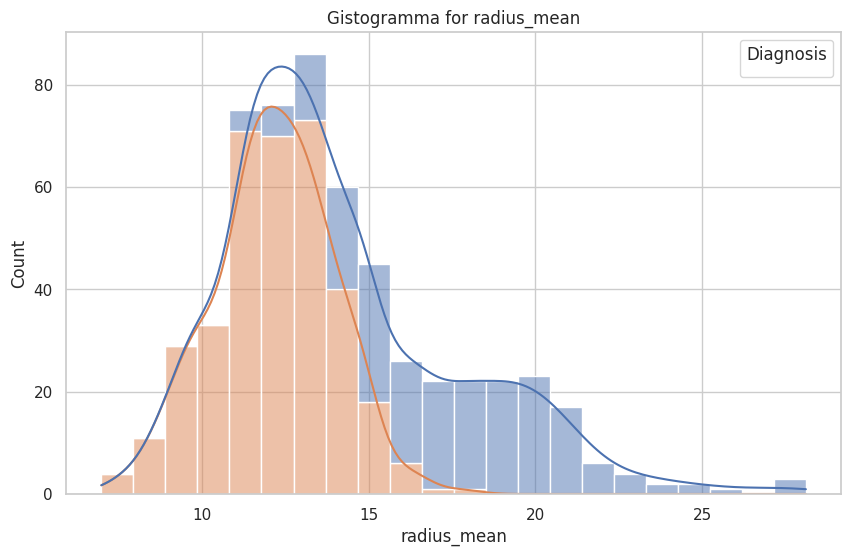

/tmp/ipython-input-4219132524.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


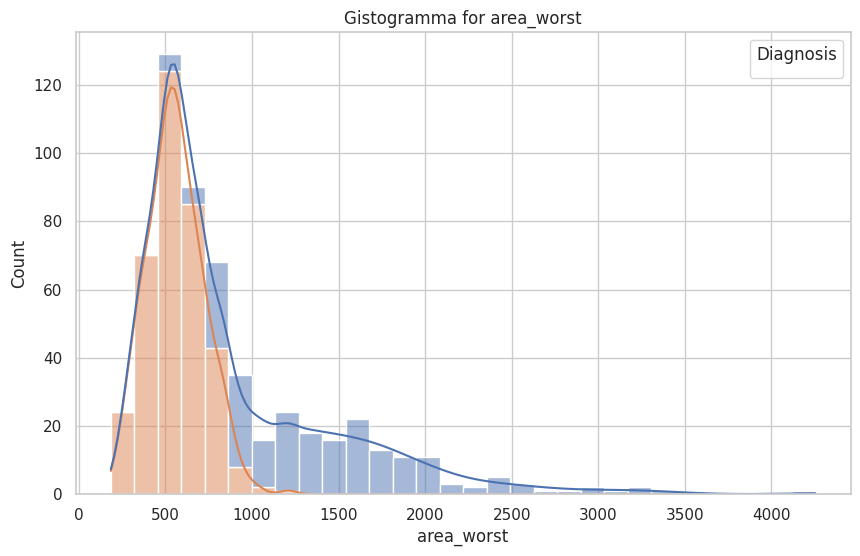

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))  # Размер фигуры
    sns.histplot(data=df, x=feature, hue=target_variable, multiple="stack", kde=True)
    plt.title(f"Gistogramma for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Diagnosis")
    plt.show()

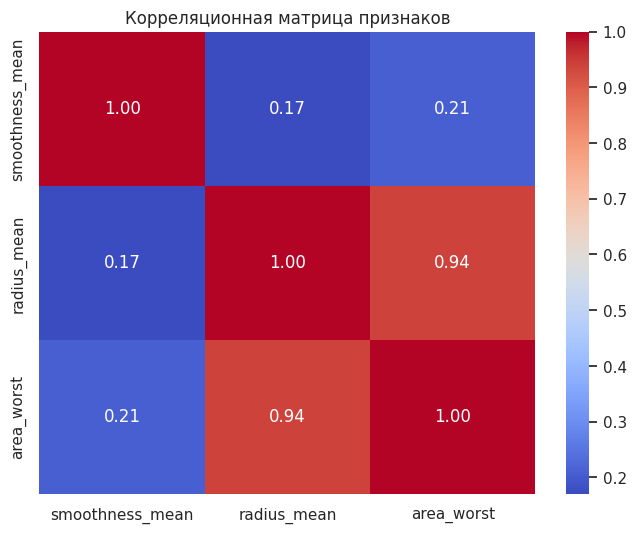

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('корреляционная матрица признаков')
plt.show()


In [ ]:
# Высокие положительные значения означают прямую зависимость, отрицательные — обратную.Корреляция наблюдается между признаками "radius_mean" и "area_worst"

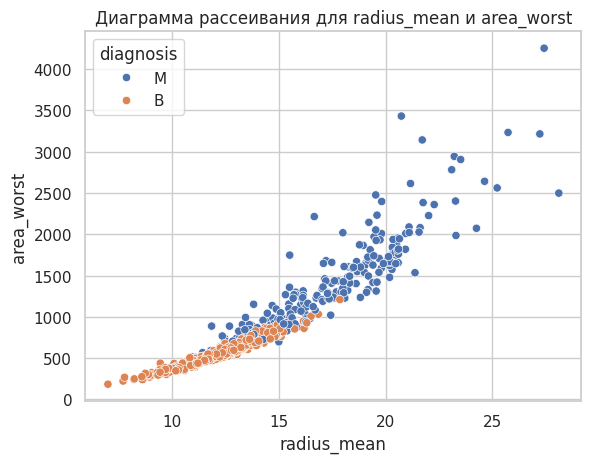

In [ ]:
sns.scatterplot(x=df['radius_mean'], y=df['area_worst'], hue=df[target_variable])
plt.title('Диаграмма рассеивания для radius_mean и area_worst')
plt.show()


In [ ]:
# Распределение точек помогает определить наличие зависимости между этими признаками/

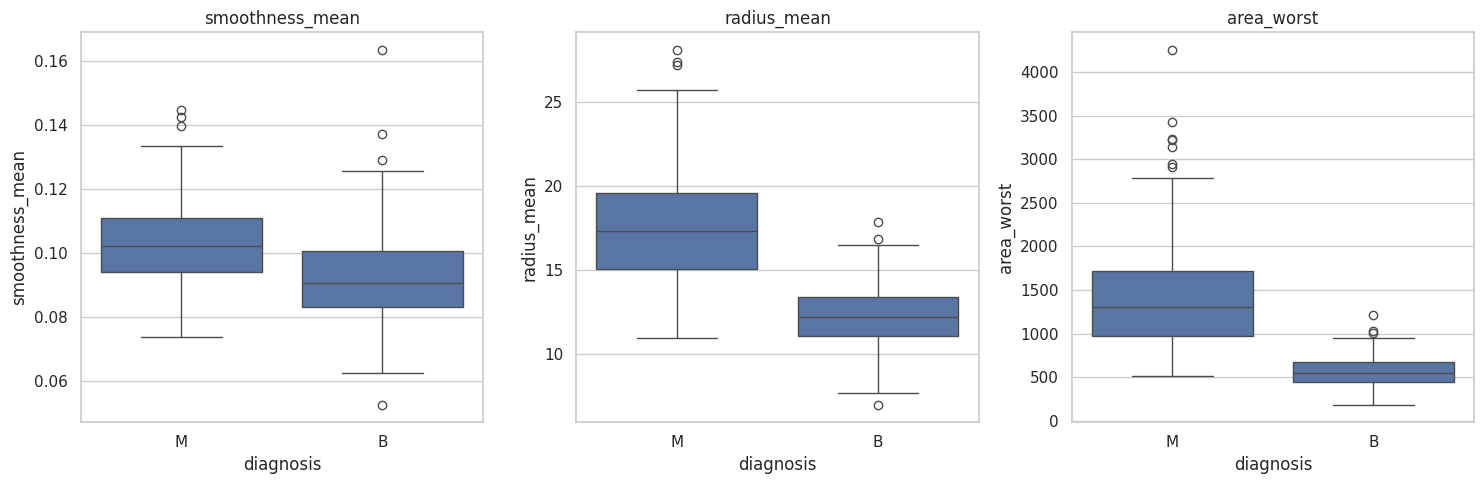

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))
for i, feature in enumerate(features):
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()

In [ ]:
# Наиболее удобным признаком для разделения злокачественных и доброкачественных кажется "area_worst"

In [ ]:
# Часть 2. Моделирование при помощи kNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target_variable], test_size=0.2, random_state=42, stratify=df[target_variable])

In [ ]:
# п.2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# важнa, потому что разные признаки имеют различные единицы измерения и масштаб, что негативно влияет на алгоритмы вроде kNN, чувствительные к расстоянию между объектами.

In [ ]:
# п.3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))  # показатели точности и тп


              precision    recall  f1-score   support

           B       0.89      0.97      0.93        72
           M       0.94      0.79      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



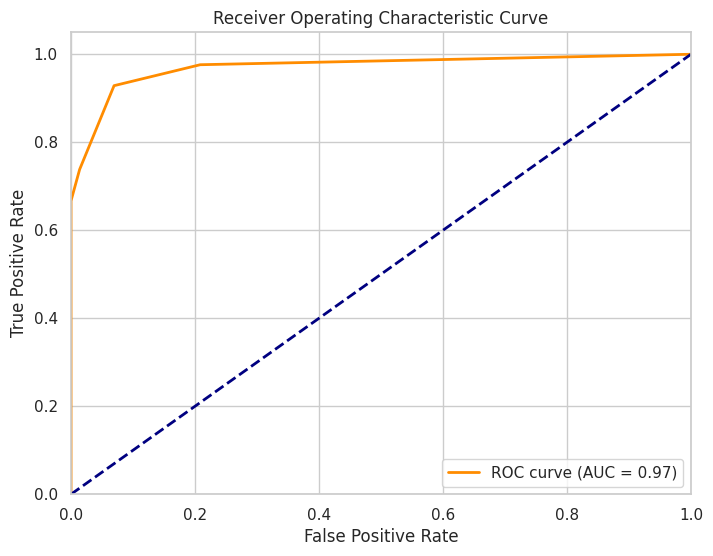

In [28]:
# строим ROC кривую
proba_scores = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba_scores, pos_label='M')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# п.4

Оптимальное число соседей: 4
              precision    recall  f1-score   support

           B       0.88      0.99      0.93        72
           M       0.97      0.76      0.85        42

    accuracy                           0.90       114
   macro avg       0.92      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114



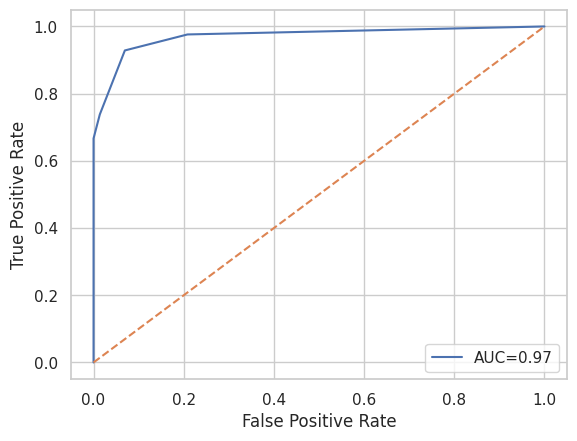

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Оптимальное число соседей: {best_k}")

# проверка качества модели с лучшим числом соседей
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_final))

# новая ROC-кривая
proba_scores_final = final_model.predict_proba(X_test_scaled)[:, 1]
fpr_final, tpr_final, _ = roc_curve(y_test, proba_scores, pos_label='M')
roc_auc_final = auc(fpr_final, tpr_final)

plt.plot(fpr_final, tpr_final, label=f'AUC={roc_auc_final:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# получили улучшенные показатели после оптимизации числа соседей.Улучшение заключается в увеличении accuracy, precision, recall, f1_score